This simple noebook compares the *discharges in a pipe at laminar and turbulent flow conditions*, using Hagen- Poiseuille and Darcy-Weisbach Equations, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
%matplotlib inline

Desired conduit diameter (m):
1
Desired conduit wall roughness, kc (m):
0.1
Desired conduit length (m):
10


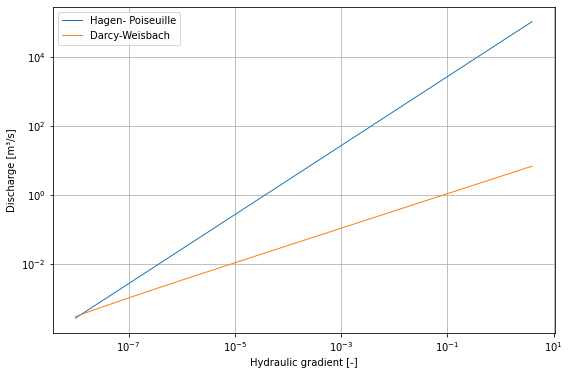

In [2]:
# Inputs:


##### Fixed values and constants:
k_viscos_w = 8.927E-07         # m^2/s, Water kynematic viscosity at 25 degree Celsuis
                               # (Reference: https://www.engineeringtoolbox.com/water-dynamic-kinematic-viscosity-d_596.html)
g = 9.80665                    # m/s^2, Gravitational acceleration
count = 1000                   # Number of calculated values
dh_initial = 1E-8              # Initial_dh for computation (m)
dh_growth = 0.02               # A dh growth factor (-) 


##### Difining the variables (Initialization with zero cells)
dh = np.zeros(count)
Q_lam = np.zeros(count)
Q_turb = np.zeros(count)

##### Pipe input data
print ("Desired conduit diameter (m):")                            # Test value: 1 meters
d = float(input())
print ("Desired conduit wall roughness, kc (m):")                  # Test value: 0.05 m
rough = float(input())
print ("Desired conduit length (m):")                              # Test value: 1000 m
l = int(input())
r = d / 2                                                          # Conduit diameter
A = np.pi * r**2                                                   # Conduit area


##### Flow computations
for i in range(0,count):
    if i==0:
        dh[i] = dh_initial
    else:
        dh[i] = dh[i-1] * dh_growth + dh[i-1]
    Q_lam[i] = np.pi * d ** 4 * g * dh[i] / (128 * k_viscos_w * l)   # Hagen- Poiseuille Equation
    Q_turb[i] = np.sqrt(dh[i] * g * d ** 5 * np.pi ** 2 / (2 * l)) * np.log10 ((2.51 * k_viscos_w / np.sqrt (2 * dh[i] * g * d ** 3 / l)) + (rough / (3.71 * d)))* (-1) # Darcy-Weisbach Equation   

##### Graph preparation
D = {"Hagen- Poiseuille": Q_lam, "Darcy-Weisbach": Q_turb}
df = pd.DataFrame(D) # Generating result table
label = ["Hagen- Poiseuille", "Darcy-Weisbach"]
fig = plt.figure(figsize=(9,6))
plt.plot(dh, Q_lam, dh, Q_turb, linewidth=1);  # plotting the results
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Hydraulic gradient [-]"); plt.ylabel("Discharge [m\u00b3/s]") # placing axis labels
plt.legend(label, loc=0);plt.grid(); plt.xlim(); plt.ylim() # legends, grids, x,y limits
plt.show() # display plot





(1000,)